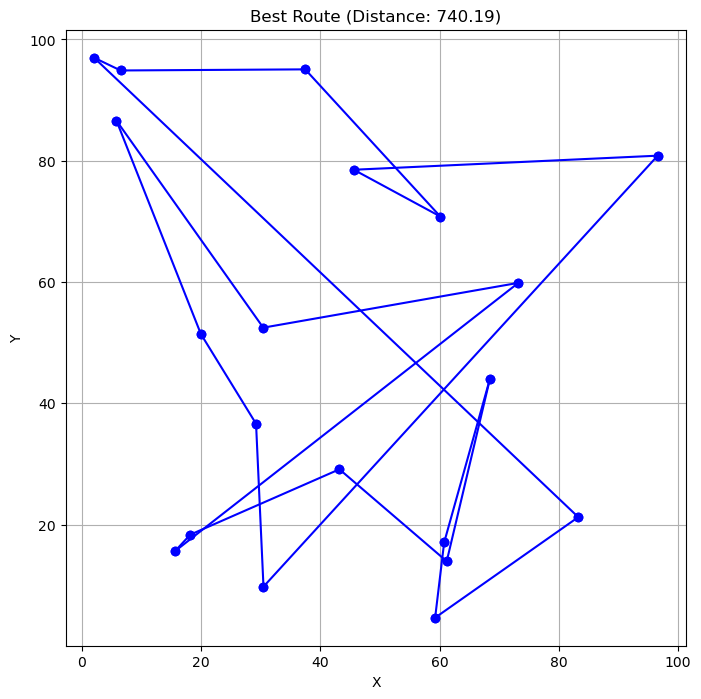

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Step 1: Generate random coordinates
np.random.seed(42)
num_points = 20
locations = np.random.rand(num_points, 2) * 100  # Random points in a 100x100 grid

# Step 2: Genetic Algorithm components

# Fitness function: total distance of the route
def calculate_distance(route, locations):
    distance = 0
    for i in range(len(route)):
        start = locations[route[i]]
        end = locations[route[(i + 1) % len(route)]]
        distance += np.linalg.norm(start - end)
    return distance

# Initialize population with random routes
def initialize_population(size, num_points):
    return [random.sample(range(num_points), num_points) for _ in range(size)]

# Selection: select the fittest individuals
def select_parents(population, fitnesses, num_parents):
    parents = np.argsort(fitnesses)[:num_parents]
    return [population[i] for i in parents]

# Crossover: create offspring by combining two parents
def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child = [-1] * len(parent1)
    child[start:end] = parent1[start:end]
    fill_from_parent2 = [gene for gene in parent2 if gene not in child]
    fill_index = 0
    for i in range(len(child)):
        if child[i] == -1:
            child[i] = fill_from_parent2[fill_index]
            fill_index += 1
    return child

# Mutation: swap two cities in the route
def mutate(route, mutation_rate):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(route)), 2)
        route[i], route[j] = route[j], route[i]
    return route

# Step 3: Run the Genetic Algorithm
def genetic_algorithm(locations, pop_size=50, generations=200, mutation_rate=0.9):
    population = initialize_population(pop_size, len(locations))
    best_route = None
    best_distance = float('inf')

    for gen in range(generations):
        fitnesses = [calculate_distance(route, locations) for route in population]
        if min(fitnesses) < best_distance:
            best_distance = min(fitnesses)
            best_route = population[np.argmin(fitnesses)]
        parents = select_parents(population, fitnesses, pop_size // 2)
        next_generation = []
        for i in range(len(parents) // 2):
            for _ in range(2):  # Create two children per pair
                child = crossover(parents[i], parents[-i - 1])
                child = mutate(child, mutation_rate)
                next_generation.append(child)
        population = next_generation

    return best_route, best_distance

# Run the algorithm
best_route, best_distance = genetic_algorithm(locations)

# Step 4: Visualize the route on a map
plt.figure(figsize=(8, 8))
for i in range(len(best_route)):
    start = locations[best_route[i]]
    end = locations[best_route[(i + 1) % len(best_route)]]
    plt.plot([start[0], end[0]], [start[1], end[1]], 'b-o')

plt.title(f"Best Route (Distance: {best_distance:.2f})")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()